## **Text Classification**

Emotion Detector / Emotion Classification System

## **Library Installation**

In [ ]:
!pip install transformers
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 73.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 29.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 120.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 36.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 29.8 MB/s eta 0:00:

[link text](https://)## **Hugging Face Datasets**

In [ ]:
from datasets import list_datasets

In [ ]:
all_datasets = list_datasets()

In [ ]:
print("Total datasets count: ", len(all_datasets))

Total datasets count:  36270


In [ ]:
print(all_datasets[:10])

['acronym_identification', 'ade_corpus_v2', 'adversarial_qa', 'aeslc', 'afrikaans_ner_corpus', 'ag_news', 'ai2_arc', 'air_dialogue', 'ajgt_twitter_ar', 'allegro_reviews']


In [ ]:
#Lets load Emotion Dataset
from datasets import load_dataset
emotions = load_dataset("emotion")

Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Dataset emotion downloaded and prepared to /root/.cache/huggingface/datasets/emotion/split/1.0.0/cca5efe2dfeb58c1d098e0f9eeb200e9927d889b5a03c67097275dfb5fe463bd. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

## **Emotion Data Exploration**

In [ ]:
emotions

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [ ]:
train_data = emotions["train"]

In [ ]:
train_data

Dataset({
    features: ['text', 'label'],
    num_rows: 16000
})

In [ ]:
len(train_data)

16000

In [ ]:
train_data[0]

{'text': 'i didnt feel humiliated', 'label': 0}

In [ ]:
train_data[0:5]

{'text': ['i didnt feel humiliated',
  'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
  'im grabbing a minute to post i feel greedy wrong',
  'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
  'i am feeling grouchy'],
 'label': [0, 0, 3, 2, 3]}

In [ ]:
train_data.column_names

['text', 'label']

In [ ]:
train_data["text"][:5]

['i didnt feel humiliated',
 'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake',
 'im grabbing a minute to post i feel greedy wrong',
 'i am ever feeling nostalgic about the fireplace i will know that it is still on the property',
 'i am feeling grouchy']

In [ ]:
train_data["label"][:5]

[0, 0, 3, 2, 3]

In [ ]:
train_data.features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], id=None)}

## **Convert Hugging Face Datasets to Pandas Dataframe**

In [ ]:
import pandas as pd

In [ ]:
emotions.set_format(type="pandas")

In [ ]:
train_df = emotions["train"][:]

In [ ]:
train_df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [ ]:
def label_int2str(row):
  emotion_label = emotions["train"].features["label"].int2str(row)
  return emotion_label

In [ ]:
train_df["label_name"] = train_df["label"].apply(label_int2str)

In [ ]:
train_df.head(10)

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger
5,ive been feeling a little burdened lately wasn...,0,sadness
6,ive been taking or milligrams or times recomme...,5,surprise
7,i feel as confused about life as a teenager or...,4,fear
8,i have been with petronas for years i feel tha...,1,joy
9,i feel romantic too,2,love


# **Lets dig deeper into Data Exploration**

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
train_df["label_name"].value_counts(ascending=True)

surprise     572
love        1304
fear        1937
anger       2159
sadness     4666
joy         5362
Name: label_name, dtype: int64

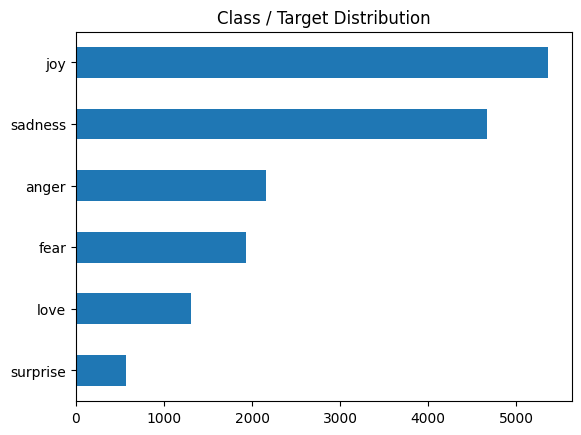

In [ ]:
train_df["label_name"].value_counts(ascending=True).plot.barh()
plt.title("Class / Target Distribution")
plt.show()

## **Lets Explore the Textual Data**

In [ ]:
train_df["tokens per tweet"] = train_df["text"].str.split().apply(len)

In [ ]:
train_df.head(10)

,text,label,label_name,tokens per tweet
0,i didnt feel humiliated,0,sadness,4
1,i can go from feeling so hopeless to so damned...,0,sadness,21
2,im grabbing a minute to post i feel greedy wrong,3,anger,10
3,i am ever feeling nostalgic about the fireplac...,2,love,18
4,i am feeling grouchy,3,anger,4
5,ive been feeling a little burdened lately wasn...,0,sadness,12
6,ive been taking or milligrams or times recomme...,5,surprise,23
7,i feel as confused about life as a teenager or...,4,fear,17
8,i have been with petronas for years i feel tha...,1,joy,19
9,i feel romantic too,2,love,4


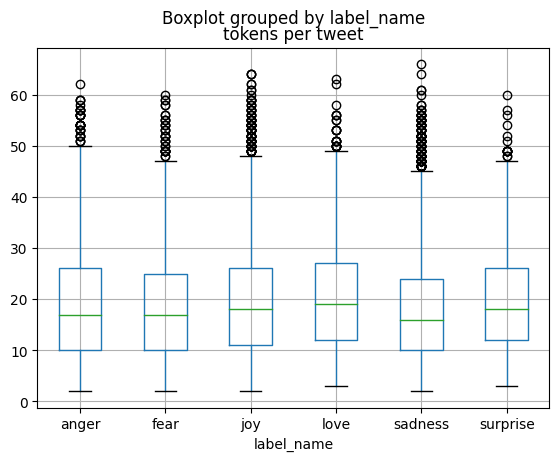

In [ ]:
train_df.boxplot("tokens per tweet", by="label_name")
plt.show()

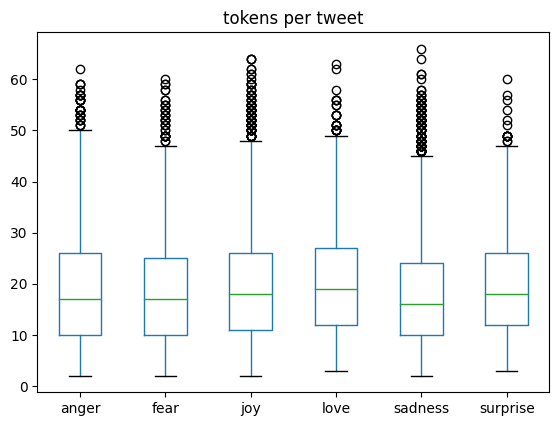

In [ ]:
train_df.boxplot("tokens per tweet", by="label_name", grid=False)
plt.suptitle("")
plt.xlabel("")
plt.show()

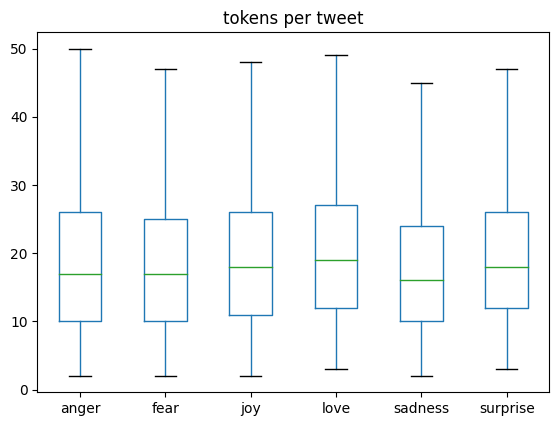

In [ ]:
train_df.boxplot("tokens per tweet", by="label_name", grid=False, showfliers=False)
plt.suptitle("")
plt.xlabel("")
plt.show()

## **Lets Reset the Dataset Format**

In [ ]:
emotions.reset_format()

## **Lets Convert Text to Tokens - Tokenization**

In [ ]:
#Character Tokenization and Word Tokenization

**Character Tokenization**

In [ ]:
text = "An example of tokenization."
tokenized_text = list(text)
print(tokenized_text)

['A', 'n', ' ', 'e', 'x', 'a', 'm', 'p', 'l', 'e', ' ', 'o', 'f', ' ', 't', 'o', 'k', 'e', 'n', 'i', 'z', 'a', 't', 'i', 'o', 'n', '.']


In [ ]:
token_to_ids = {}
for id, char in enumerate(sorted(set(tokenized_text))):
  token_to_ids[id] = char
print(token_to_ids)

{0: ' ', 1: '.', 2: 'A', 3: 'a', 4: 'e', 5: 'f', 6: 'i', 7: 'k', 8: 'l', 9: 'm', 10: 'n', 11: 'o', 12: 'p', 13: 't', 14: 'x', 15: 'z'}


**Word Tokenization**

In [ ]:
text = "An example of tokenization."
tokenized_text = text.split()
print(tokenized_text)

['An', 'example', 'of', 'tokenization.']


# **Subword Tokenization**

**Lets see WordPiece in ACTION**

In [ ]:
from transformers import AutoTokenizer

In [ ]:
model_name = "distilbert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)

In [ ]:
text = "An example of tokenization."
tokenized_text = tokenizer(text)

In [ ]:
print(tokenized_text)

{'input_ids': [101, 2019, 2742, 1997, 19204, 3989, 1012, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1]}


In [ ]:
tokens = tokenizer.convert_ids_to_tokens(tokenized_text.input_ids)

In [ ]:
print(tokens)

['[CLS]', 'an', 'example', 'of', 'token', '##ization', '.', '[SEP]']


In [ ]:
regerate_input_text = tokenizer.convert_tokens_to_string(tokens)

In [ ]:
print(regerate_input_text)

[CLS] an example of tokenization. [SEP]


In [ ]:
print(tokenizer.vocab_size)

30522


In [ ]:
print(tokenizer.model_max_length)

512


In [ ]:
print(tokenizer.model_input_names)

['input_ids', 'attention_mask']


## **Lets TOKENIZE ENTIRE / WHOLE DATASET**

In [ ]:
def tokenize_whole_dataset(input_batch):
  tokenized_batch = tokenizer(input_batch["text"], padding=True, truncation=True)
  return tokenized_batch


In [ ]:
emotions_encoded = emotions.map(tokenize_whole_dataset, batched=True, batch_size=None)

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

# **HURRAY WE HAVE SUCCESSFULLY COMPLETYED WITH TOKENIZATION**

In [ ]:
print(emotions_encoded["train"][0])

{'text': 'i didnt feel humiliated', 'label': 0, 'input_ids': [101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}


# Training

## Approach 1 - Using Transformers as Feature Extractors

In [ ]:
from transformers import AutoModel
import torch

In [ ]:
model_name = "distilbert-base-uncased"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AutoModel.from_pretrained(model_name).to(device)

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_transform.weight', 'vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_transform.bias', 'vocab_projector.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Extracting the last Hidden States

In [ ]:
text = "This is an example text"
inputs = tokenizer(text, return_tensors="pt")
inputs = {k:v.to(device) for k,v in inputs.items()}

with torch.no_grad():
  outputs = model(**inputs)

In [ ]:
print(outputs)

BaseModelOutput(last_hidden_state=tensor([[[-0.2391, -0.1517, -0.0160,  ..., -0.1668,  0.1648,  0.4822],
         [-0.7703, -0.4760, -0.2587,  ..., -0.3728,  0.5031,  0.3316],
         [-0.6166, -0.3225,  0.0930,  ..., -0.2590,  0.0544,  1.0647],
         ...,
         [-0.4514,  0.1085, -0.2622,  ..., -0.5667, -0.0332,  0.1992],
         [-0.2444, -0.2036, -0.2633,  ...,  0.0076, -0.0262,  0.2151],
         [ 0.9700,  0.0799, -0.5457,  ...,  0.1961, -0.8037, -0.1788]]],
       device='cuda:0'), hidden_states=None, attentions=None)


In [ ]:
print(outputs.last_hidden_state)

tensor([[[-0.2391, -0.1517, -0.0160,  ..., -0.1668,  0.1648,  0.4822],
         [-0.7703, -0.4760, -0.2587,  ..., -0.3728,  0.5031,  0.3316],
         [-0.6166, -0.3225,  0.0930,  ..., -0.2590,  0.0544,  1.0647],
         ...,
         [-0.4514,  0.1085, -0.2622,  ..., -0.5667, -0.0332,  0.1992],
         [-0.2444, -0.2036, -0.2633,  ...,  0.0076, -0.0262,  0.2151],
         [ 0.9700,  0.0799, -0.5457,  ...,  0.1961, -0.8037, -0.1788]]],
       device='cuda:0')


In [ ]:
print(outputs.last_hidden_state.shape)

torch.Size([1, 7, 768])


In [ ]:
print(outputs.last_hidden_state[:,0])

tensor([[-2.3912e-01, -1.5172e-01, -1.5982e-02, -2.3214e-01, -1.2899e-01,
         -3.2724e-01,  7.3064e-02,  2.9873e-01, -2.0581e-01, -1.9504e-01,
         -2.6443e-01, -1.2464e-01, -2.5928e-01,  5.0384e-02,  4.4647e-02,
          1.6637e-01, -9.8618e-02,  1.5167e-01,  1.3932e-01, -1.4391e-01,
         -6.5480e-02, -1.6788e-01, -1.6692e-01, -2.1370e-01,  2.3949e-01,
         -1.2115e-01,  5.8287e-02, -1.3732e-01, -1.7371e-01,  7.8635e-02,
          2.1890e-02,  9.5468e-02,  1.0176e-02, -2.6749e-02,  1.0561e-01,
         -7.8930e-02,  1.3460e-01, -3.3590e-02,  6.8415e-02,  7.0472e-02,
         -9.6242e-02, -6.7784e-02,  3.0951e-01,  7.5653e-02, -6.7530e-03,
         -2.8250e-02, -1.9705e+00,  1.5379e-02, -3.2815e-01, -2.5975e-01,
         -2.4987e-01,  6.8250e-02,  2.2126e-01,  5.3388e-01, -1.1193e-02,
          5.2037e-02, -1.9598e-01,  3.1893e-01,  2.5061e-02,  4.3089e-02,
          1.5790e-01,  6.2846e-02, -5.1282e-03, -2.3480e-02,  1.6239e-02,
          1.7174e-01, -4.5986e-02,  1.

In [ ]:
print(outputs.last_hidden_state[:,0].shape)

torch.Size([1, 768])


In [ ]:
def extract_last_hidden_state_cls_token(input_batch):
  inputs = {k:v.to(device) for k,v in input_batch.items() if k in tokenizer.model_input_names}

  with torch.no_grad():
    last_hidden_state = model(**inputs).last_hidden_state
  hidden_state_for_cls_token = last_hidden_state[:,0].cpu().numpy()
  return {"hidden_state": hidden_state_for_cls_token}

In [ ]:
emotions_encoded.set_format("torch", columns=['input_ids', 'attention_mask', 'label'])

Extract Hidden States for Entire Dataset

In [ ]:
emotions_with_hidden_states = emotions_encoded.map(extract_last_hidden_state_cls_token, batched=True)

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

### Create a feature matrix

In [ ]:
import numpy as np

X_train = np.array(emotions_with_hidden_states['train']['hidden_state'])
X_valid = np.array(emotions_with_hidden_states['validation']['hidden_state'])

Y_train = np.array(emotions_with_hidden_states['train']['label'])
Y_valid = np.array(emotions_with_hidden_states['validation']['label'])

In [ ]:
X_train.shape

(16000, 768)

In [ ]:
Y_train.shape

(16000,)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)
log_reg.score(X_valid, Y_valid)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6075

### Lets plot confusion matrx

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [ ]:
def plot_confusion_matrix(y_pred, y_true, label_names):
  cm = confusion_matrix(y_pred, y_true, normalize='true')
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_names)
  disp.plot(cmap='Blues')
  plt.title('Confusion Matrix (Normalized)')
  plt.show()

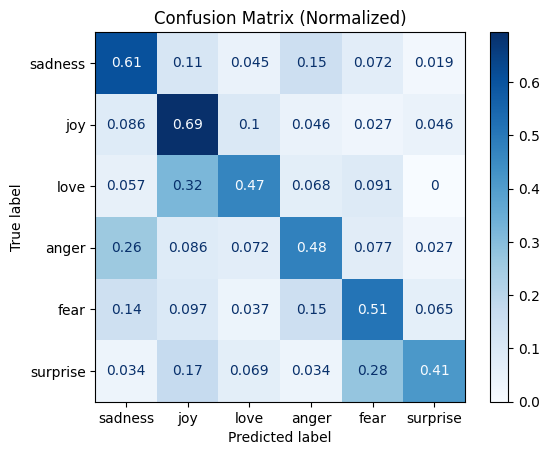

In [ ]:
y_pred = log_reg.predict(X_valid)
label_names = emotions['train'].features['label'].names
plot_confusion_matrix(y_pred, Y_valid, label_names)